In [3]:
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [2]:
img1= cv2.imread("D:\BackBag Dog.jpg")
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("D:\DoNotCopy.jpg")
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

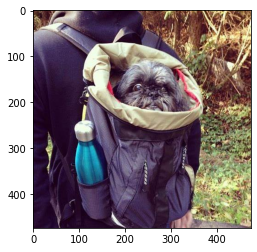

In [3]:
plt.imshow(img1)

In [4]:
img1.shape

(474, 474, 3)

In [5]:
img2.shape

(225, 222, 3)

In [6]:
# Blending Images of the same size

In [7]:
img1= cv2.resize(img1,(1000,1000))
img2= cv2.resize(img2,(1000,1000))

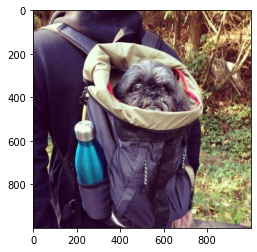

In [8]:
plt.imshow(img1)

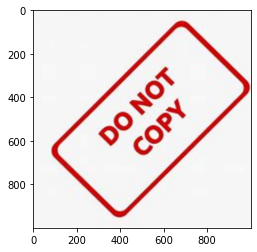

In [9]:
plt.imshow(img2)

In [10]:
blended= cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta= 0.5, gamma=0)

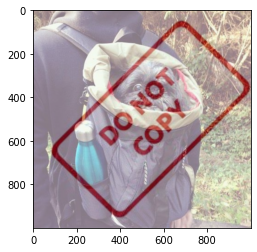

In [11]:
plt.imshow(blended)

In [12]:
# Overlay a small image on top of large image (No blending)
# Numpy reassignment 

In [13]:
img1= cv2.imread("D:\BackBag Dog.jpg")
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("D:\DoNotCopy.jpg")
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [14]:
img2= cv2.resize(img2,(200,200))

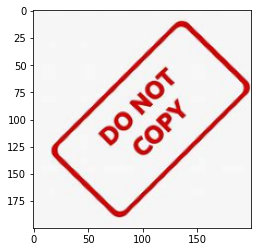

In [15]:
plt.imshow(img2)

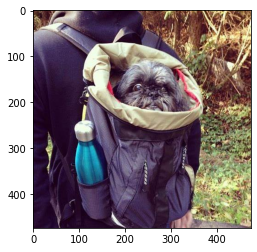

In [16]:
plt.imshow(img1)

In [17]:
large_img= img1 
small_img = img2

In [18]:
x_offset= 0   # the top left corner is the start point 
y_offset= 0

In [19]:
x_end=x_offset + small_img[1]
y_end=y_offset + small_img[0]

In [20]:
large_img[:200,:200] = small_img #[y_offset:y_end,x_offset:x_end]

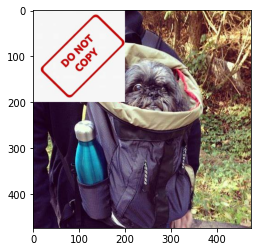

In [21]:
plt.imshow(large_img)

In [22]:
# Blend together imaged of different sizes

In [23]:
img1= cv2.imread("D:\BackBag Dog.jpg")
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread("D:\DoNotCopy.jpg")
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [24]:
img2= cv2.resize(img2,(300,300))

In [25]:
img1.shape

(474, 474, 3)

In [26]:
x_offset= 474 - 300 
y_offset= 474 - 300

In [27]:
img2.shape

(300, 300, 3)

In [28]:
rows , cols , channels = img2.shape 

In [29]:
roi = img1[y_offset:1000 , x_offset:1000 ]

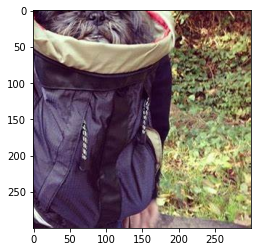

In [30]:
plt.imshow(roi)

In [31]:
# Creating Mask 

In [32]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) 

In [33]:
#img2gray.shape

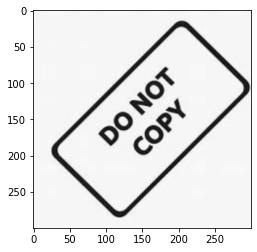

In [34]:
plt.imshow(img2gray, cmap="gray")

In [35]:
mask_inv= cv2.bitwise_not(img2gray)

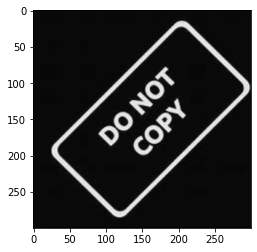

In [36]:
plt.imshow(mask_inv, cmap='gray')

In [37]:
mask_inv.shape   # No longer have color channels 

(300, 300)

In [38]:
img2.shape

(300, 300, 3)

In [39]:
import numpy as np

In [40]:
white_background= np.full(img2.shape, 255,dtype=np.uint8)

In [41]:
white_background.shape

(300, 300, 3)

In [42]:
bk=cv2.bitwise_or(white_background,white_background , mask=mask_inv)

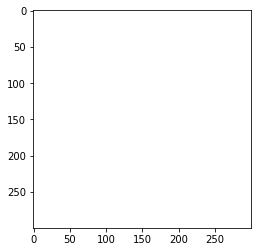

In [43]:
plt.imshow(bk)

In [44]:
bk.shape

(300, 300, 3)

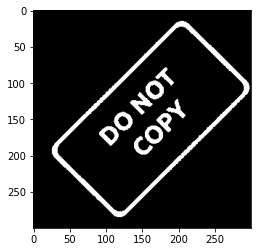

In [45]:
ret, mask1 = cv2.threshold(mask_inv, 120, 255, cv2.THRESH_BINARY)
plt.imshow(mask1, cmap='gray')

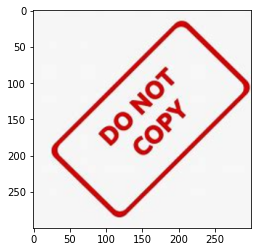

In [46]:
plt.imshow(img2)

In [47]:
fg= cv2.bitwise_or(img2,img2, mask=mask1)

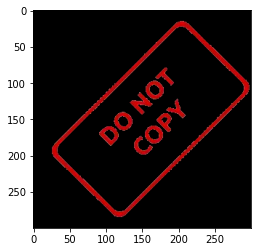

In [48]:
plt.imshow(fg)

In [49]:
final_roi = cv2.bitwise_or(fg,roi)   # using cv2.add(fg,roi) will give the same result

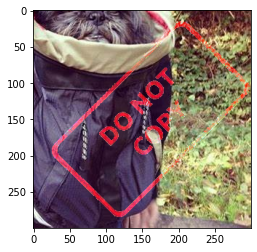

In [50]:
plt.imshow(final_roi)

In [62]:
large_img= img1

(474, 474, 3)

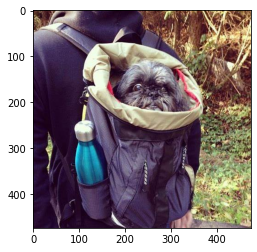

In [66]:
plt.imshow(img1)
img1.shape

In [63]:
small_img= final_roi

(300, 300, 3)

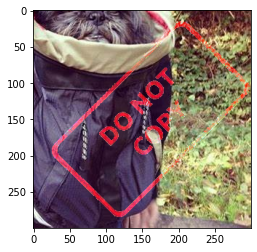

In [67]:
plt.imshow(small_img)
small_img.shape

In [68]:
#large_img[ 174:474 , 174:474]

large_img[y_offset: y_offset+small_img.shape[0] , x_offset: x_offset+small_img.shape[1]] = small_img

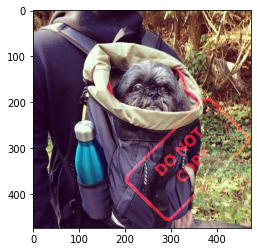

In [69]:
plt.imshow(large_img)